In [2]:
import gudhi

#####################################################################
RipsComplex creation from points
diag= [(0, (0.0, inf)), (0, (0.0, 1.0)), (0, (0.0, 1.0)), (0, (0.0, 1.0))]


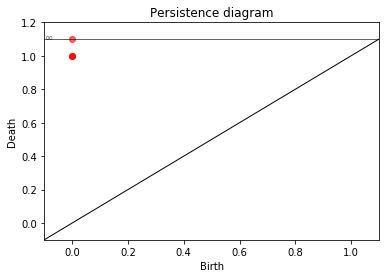

In [3]:
#!/usr/bin/env python

import gudhi

"""This file is part of the Gudhi Library. The Gudhi library
   (Geometric Understanding in Higher Dimensions) is a generic C++
   library for computational topology.

   Author(s):       Marc Glisse

   Copyright (C) 2016 Inria

   This program is free software: you can redistribute it and/or modify
   it under the terms of the GNU General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
   GNU General Public License for more details.

   You should have received a copy of the GNU General Public License
   along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

__author__ = "Marc Glisse"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "GPL v3"

print("#####################################################################")
print("RipsComplex creation from points")
rips = gudhi.RipsComplex(points=[[0, 0], [1, 0], [0, 1], [1, 1]],
                         max_edge_length=42)

simplex_tree = rips.create_simplex_tree(max_dimension=1)


diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
print("diag=", diag)

pplot = gudhi.plot_persistence_diagram(diag)
pplot.show()


In [4]:
#!/usr/bin/env python

import gudhi
import argparse

"""This file is part of the Gudhi Library. The Gudhi library
   (Geometric Understanding in Higher Dimensions) is a generic C++
   library for computational topology.

   Author(s):       Vincent Rouvreau

   Copyright (C) 2016 Inria

   This program is free software: you can redistribute it and/or modify
   it under the terms of the GNU General Public License as published by
   the Free Software Foundation, either version 3 of the License, or
   (at your option) any later version.

   This program is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
   GNU General Public License for more details.

   You should have received a copy of the GNU General Public License
   along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

__author__ = "Vincent Rouvreau"
__copyright__ = "Copyright (C) 2016 Inria"
__license__ = "GPL v3"

parser = argparse.ArgumentParser(description='RipsComplex creation from '
                                 'points read in a OFF file.',
                                 epilog='Example: '
                                 'example/rips_complex_diagram_persistence_from_off_file_example.py '
                                 '-f ../data/points/tore3D_300.off -a 0.6'
                                 '- Constructs a Rips complex with the '
                                 'points from the given OFF file.')
parser.add_argument("-f", "--file", type=str, required=True)
parser.add_argument("-e", "--max_edge_length", type=float, default=0.5)
parser.add_argument("-d", "--max_dimension", type=int, default=1)
parser.add_argument("-b", "--band", type=float, default=0.)
parser.add_argument('--no-diagram', default=False, action='store_true' , help='Flag for not to display the diagrams')

args = parser.parse_args()

with open(args.file, 'r') as f:
    first_line = f.readline()
    if (first_line == 'OFF\n') or (first_line == 'nOFF\n'):
        print("#####################################################################")
        print("RipsComplex creation from points read in a OFF file")
        
        message = "RipsComplex with max_edge_length=" + repr(args.max_edge_length)
        print(message)
        
        point_cloud = gudhi.read_off(off_file=args.file)
        rips_complex = gudhi.RipsComplex(points=point_cloud, max_edge_length=args.max_edge_length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=args.max_dimension)
    
        message = "Number of simplices=" + repr(simplex_tree.num_simplices())
        print(message)
        
        diag = simplex_tree.persistence()
    
        print("betti_numbers()=")
        print(simplex_tree.betti_numbers())
    
        if args.no_diagram == False:
            pplot = gudhi.plot_persistence_diagram(diag, band=args.band)
            pplot.show()
    else:
        print(args.file, "is not a valid OFF file")

    f.close()


/Users/Shouman/Library/Jupyter/runtime/kernel-032bb3a4-35bf-4956-9027-6cc3777e4f85.json is not a valid OFF file
